In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
#-------------------------------------------------------------------------------------------------------#
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV,train_test_split,StratifiedKFold
from sklearn.metrics import accuracy_score ,precision_score, recall_score, f1_score , classification_report , roc_curve , auc



In [ ]:
df = pd.read_csv("/content/Bank Churn.csv")

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
#pip install SweetViz

In [ ]:
# import sweetviz as sv
# sweet = sv.analyze(df)
# sweet.show_html("mini_project3.html")

In [ ]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography             11
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
px.pie(df,values='EstimatedSalary',names='Exited',hole=0.5)

In [ ]:
px.pie(df,values='Exited',names='Gender',hole=0.5)

In [ ]:
df.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


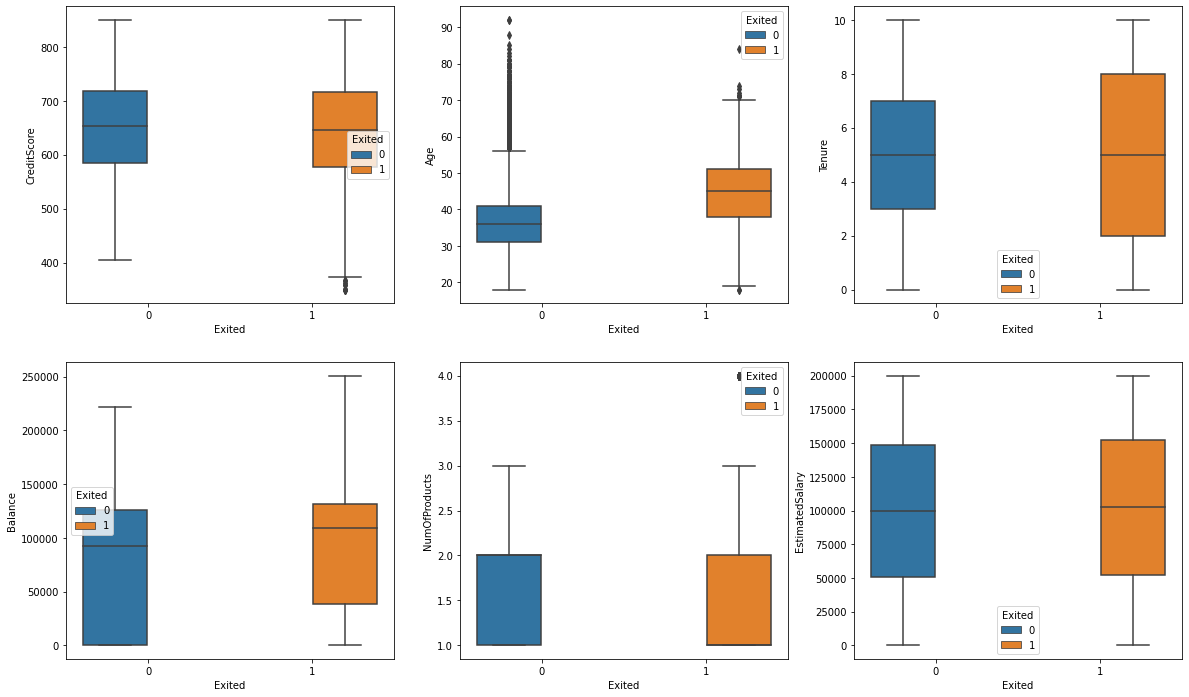

In [ ]:
cols = ['CreditScore', 'Age',
       'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary']
fig,ax = plt.subplots(2,3,figsize=(20,12))

for i,j in zip(cols,ax.flatten()):
  sns.boxplot(y=i,x='Exited',hue="Exited",ax=j,data=df)

In [ ]:
df_copy = df.copy() 

In [ ]:
df = df.drop(['CustomerId'],axis=1)

In [ ]:
!pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 12.0 MB/s eta 0:00:00
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


GridSpec(6, 3)

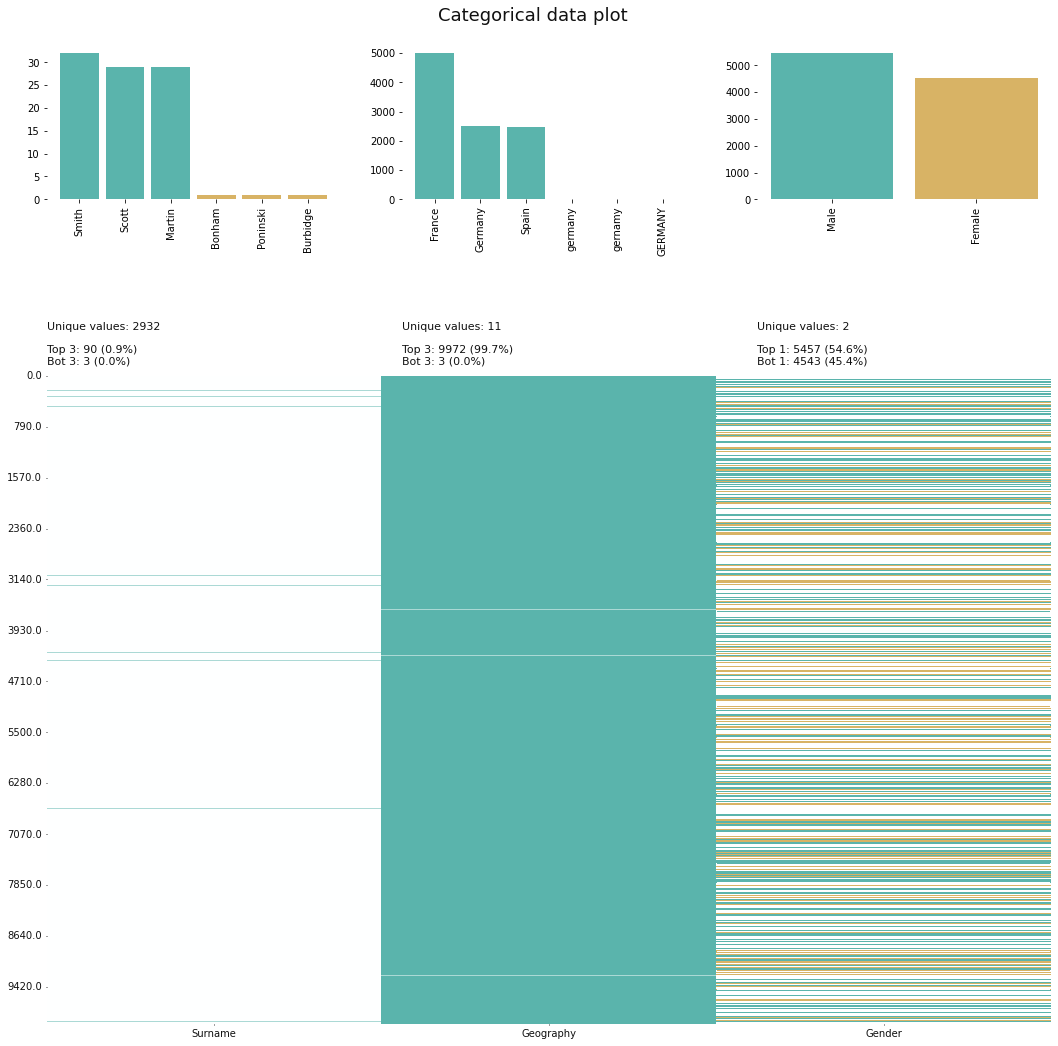

In [ ]:
import klib
klib.cat_plot(df_copy)

In [ ]:
klib.data_cleaning(df_copy)

Shape of cleaned data: (10000, 13) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.7 MB (-70.71%)



,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,15634602,Hargrave,619,France,Female,42,2,0.000000,1,1,1,101348.882812,1
1,15647311,Hill,608,Spain,Female,41,1,83807.859375,1,0,1,112542.578125,0
2,15619304,Onio,502,France,Female,42,8,159660.796875,3,1,0,113931.570312,1
3,15701354,Boni,699,France,Female,39,1,0.000000,2,0,0,93826.632812,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.820312,1,1,1,79084.101562,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.000000,2,1,0,96270.640625,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.609375,1,1,1,101699.773438,0
9997,15584532,Liu,709,France,Female,36,7,0.000000,1,0,1,42085.578125,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.312500,2,1,0,92888.523438,1


In [ ]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Geography'].value_counts()

France     5001
Germany    2502
Spain      2469
france        7
espanio       6
fra           6
ger           4
spain         2
germany       1
gernamy       1
GERMANY       1
Name: Geography, dtype: int64

In [ ]:
df.loc[((df['Geography']=='fra') | (df['Geography']=='france')),'Geography'] = 'France'
df.loc[((df['Geography']=='ger') | (df['Geography']=='germany') | (df['Geography']=='gernamy') | (df['Geography']=='GERMANY')),'Geography']='Germany'
df.loc[((df['Geography']=='espanio') | (df['Geography']=='spain')),'Geography'] = 'Spain'

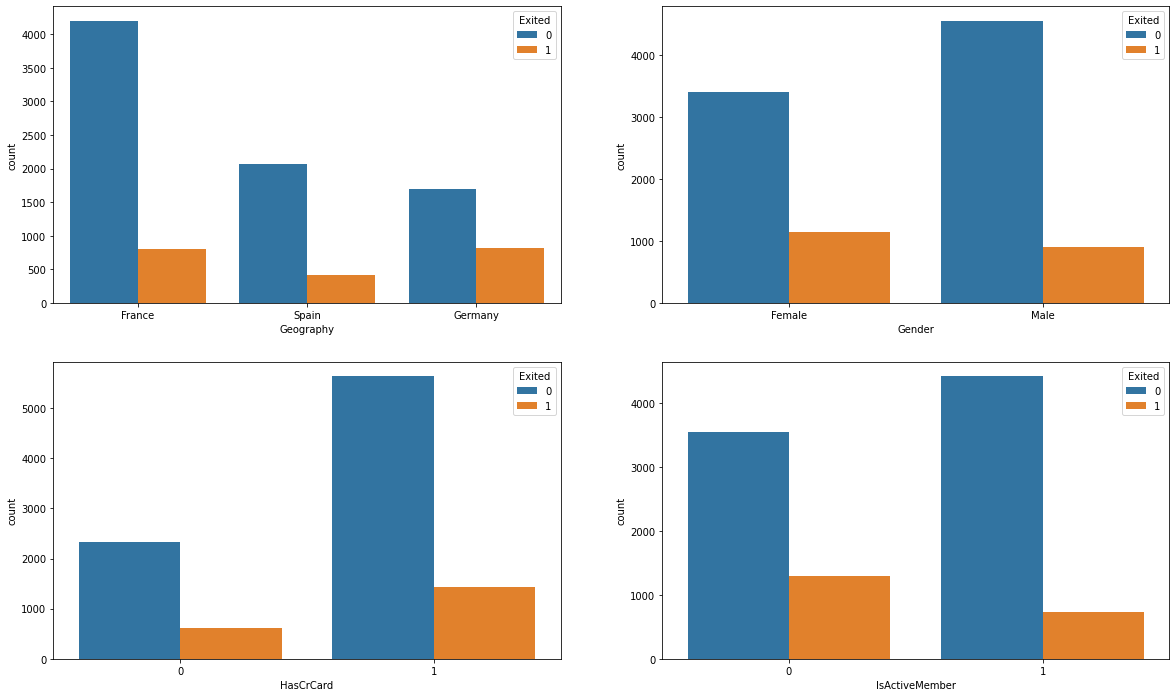

In [ ]:

cols = ['Geography','Gender','HasCrCard','IsActiveMember']

fig,ax = plt.subplots(2,2,figsize=(20,12))

for i,j in zip(cols,ax.flatten()):
  sns.countplot(x=i,hue='Exited',ax=j,data=df)




In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
# france = FR
# spain = ESP
# Geography = DEU

In [ ]:
df1 = df.copy()

In [ ]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df1 = df.copy()

In [ ]:
df.loc[df['Geography']=='France','iso-alpha']='FR'
df.loc[df['Geography']=='Spain','iso-alpha']='ESP'
df.loc[df['Geography']=='Germany','iso-alpha']='DEU'

In [ ]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,iso-alpha
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,FR
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,ESP
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,FR
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,FR
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,ESP


In [ ]:
map_fig  = px.scatter_geo(df,
                          locations='iso-alpha',
                          projection='orthographic',
                          color = 'Gender',
                          opacity = 0.20,
                          hover_data = ['Balance','EstimatedSalary','Exited'],
                          #template = 'plotly_dark',
                          size = 'Exited')
map_fig.show()

In [ ]:
df1.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df1 = df1.drop(['Surname'],axis=1)

In [ ]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
category = df1.select_dtypes(include="object").columns
category

Index(['Geography', 'Gender'], dtype='object')

In [ ]:
le = LabelEncoder()

df1["Geography"] = le.fit_transform(df1["Geography"])
df1["Gender"] = le.fit_transform(df1["Gender"])

In [ ]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


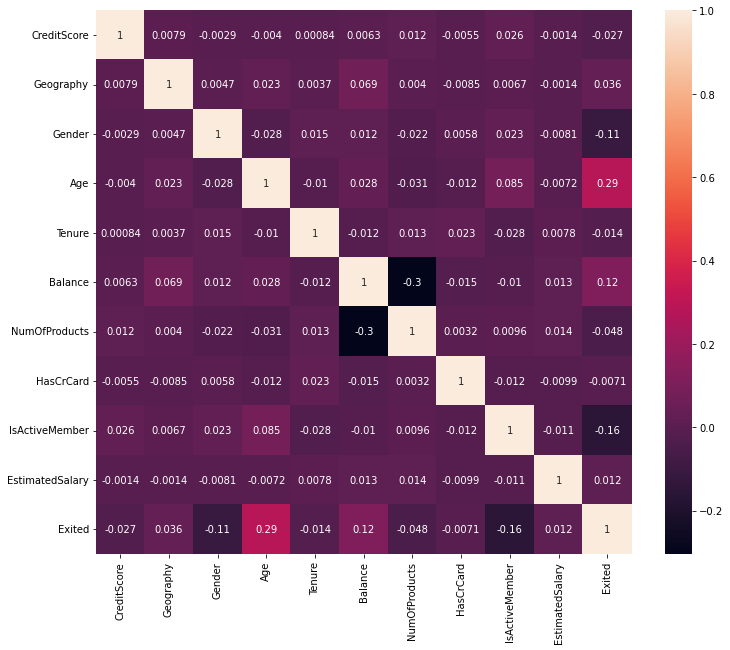

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(),annot=True)
plt.show()

## CHECKING SKEWNESS

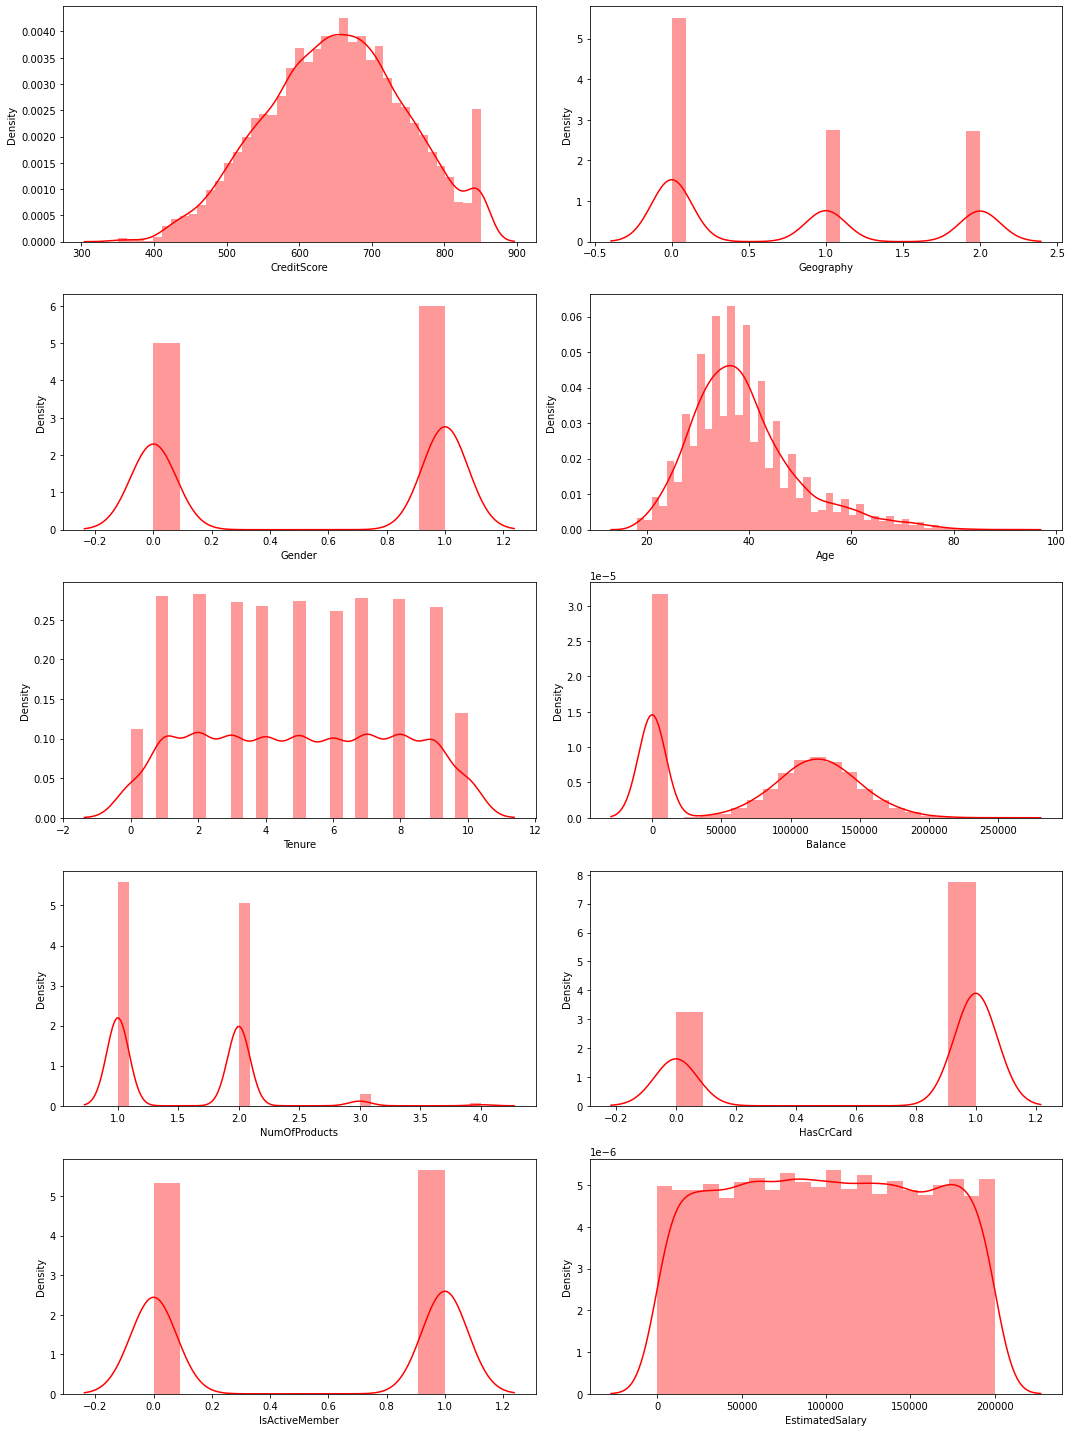

In [ ]:
fig,ax = plt.subplots(5,2,figsize=(15,20))

for col,i in zip(df1.columns,ax.flatten()):
  sns.distplot(df1[col],ax=i,color='red')
  plt.tight_layout()

In [ ]:
find_skewness = df1.skew()
find_skewness

CreditScore       -0.071607
Geography          0.500916
Gender            -0.183596
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [ ]:
skewed_value = []
negative_skewed_value =[]
for i in find_skewness:
  if i> 1:
    skewed_value.append(i)
  elif i <-0.1:
    negative_skewed_value.append(i)
    
skewed_value
negative_skewed_value
value1 = {"POSITIVE SKEWED":skewed_value,"NEGATIVE SKEWED":negative_skewed_value}
print(tabulate(value1,headers=["POSITIVE SKEWED","NEGATIVE SKEWED"]))

  POSITIVE SKEWED    NEGATIVE SKEWED
-----------------  -----------------
          1.01132          -0.183596
          1.47161          -0.141109
                           -0.901812


## CHECKING OUTLIERS

In [ ]:
def outliers(value):
  outliers1 = []
  q1 = df1[value].quantile(0.25)
  q3 = df1[value].quantile(0.75)
  iqr = q3-q1
  LF = q1 - 1.5*iqr
  UF = q3 + 1.5*iqr
  for i in df1[value]:
    if i <LF :
      outliers1.append(i)
    elif i>UF:
      outliers1.append(i)
  fig,ax = plt.subplots(1,2,figsize=(6,4))
  sns.boxplot(df1[value],ax=ax[0])
  plt.hist(df1[value],color='red',edgecolor='black')
  return print(outliers1)


In [ ]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


[376, 376, 363, 359, 350, 350, 358, 351, 365, 367, 350, 350, 382, 373, 350]


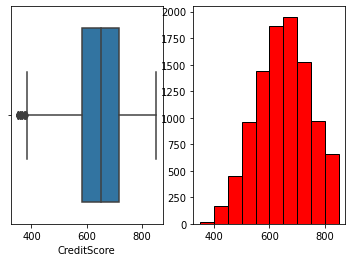

In [ ]:
outliers('CreditScore')

[]


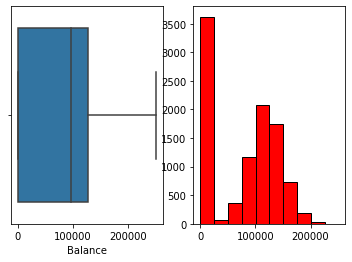

In [ ]:
outliers('Balance')

[]


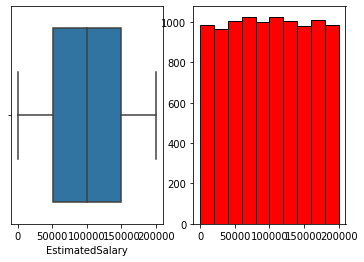

In [ ]:
outliers('EstimatedSalary')

## BUILDING MODEL

In [ ]:
X = df1.drop(['Exited'],axis=1)
X1 = df1.drop(['Exited'],axis=1)
Y = df1['Exited']

In [ ]:
sc= StandardScaler()
X = sc.fit_transform(X)

X2 = pd.DataFrame(X,columns=X1.columns)
X2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,-0.901886,0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-1.391939,-0.901886,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.604988,-0.901886,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.256835,0.306591,0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [ ]:
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
skf = StratifiedKFold(n_splits=5)

In [ ]:
m1  =LogisticRegression()
params = {
    "penalty":['l1','l2','elasticnet'],
    "fit_intercept":[True,False],
    "solver":['lbfgs','liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

## RANDOMISED SEARCH CV

In [ ]:
clf1 =RandomizedSearchCV(m1,params,cv=skf,n_jobs=-1,scoring='f1')
clf1.fit(X_train,Y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'fit_intercept': [True, False],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='f1')

In [ ]:
print(clf1.best_params_)
print(clf1.best_score_)

{'solver': 'saga', 'penalty': 'l2', 'fit_intercept': False}
0.46384116577796447


In [ ]:
lr = LogisticRegression(solver='sag',penalty='l2',fit_intercept=False)
model1 = lr.fit(X_train,Y_train)
score1 = lr.score(X_train,Y_train)
score1

0.63875

In [ ]:
lr_pred = model1.predict(x_test)
lr_pred

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import classification_report as cf
print(cf(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.92      0.59      0.72      1595
           1       0.33      0.80      0.47       405

    accuracy                           0.63      2000
   macro avg       0.63      0.70      0.60      2000
weighted avg       0.80      0.63      0.67      2000



In [ ]:
lr_accuracy = accuracy_score(y_test , lr_pred)
lr_precision = precision_score(y_test , lr_pred)
lr_recall = recall_score(y_test , lr_pred)
lr_f1 = f1_score(y_test , lr_pred)

In [ ]:
print('The Accuracy score is : ',accuracy_score(y_test , lr_pred))
print('The Precesion score is : ',precision_score(y_test , lr_pred))
print('The Recall score is :   ',recall_score(y_test , lr_pred))
print('The f1 score is : \t',f1_score(y_test , lr_pred))

The Accuracy score is :  0.634
The Precesion score is :  0.3323076923076923
The Recall score is :    0.8
The f1 score is : 	 0.4695652173913043


Text(33.0, 0.5, 'Actual')

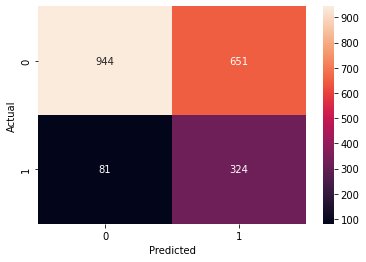

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## RANDOM FOREST CLASSIFIER

In [ ]:
m2 = RandomForestClassifier()
params = {
    "n_estimators":[10,100,1000],
    "criterion":["gini","entropy"],
    "oob_score":[True,False]

}

In [ ]:
clf2 = RandomizedSearchCV(m2,params,cv=skf,n_jobs=-1,scoring='f1')
clf2.fit(X_train,Y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'n_estimators': [10, 100, 1000],
                                        'oob_score': [True, False]},
                   scoring='f1')

In [ ]:
print(clf2.best_params_)
print(clf2.best_score_)

{'oob_score': False, 'n_estimators': 100, 'criterion': 'gini'}
0.5709079217629348


In [ ]:
rf = RandomForestClassifier(n_estimators=1000,max_features='sqrt',criterion='gini',oob_score=False)
model2 = rf.fit(X_train,Y_train)
score2 = model2.score(X_train,Y_train)
score2

1.0

In [ ]:
rf_pred = model2.predict(x_test)
rf_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(cf(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1595
           1       0.74      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
rf_accuracy = accuracy_score(y_test , rf_pred)
rf_precision = precision_score(y_test , rf_pred)
rf_recall = recall_score(y_test , rf_pred)
rf_f1 = f1_score(y_test , rf_pred)

In [ ]:
print('The Accuracy score is : ',accuracy_score(y_test , rf_pred))
print('The Precesion score is : ',precision_score(y_test , rf_pred))
print('The Recall score is :   ',recall_score(y_test , rf_pred))
print('The f1 score is : \t',f1_score(y_test , rf_pred))

The Accuracy score is :  0.864
The Precesion score is :  0.7383512544802867
The Recall score is :    0.508641975308642
The f1 score is : 	 0.6023391812865497


In [ ]:
from sklearn.metrics import confusion_matrix

Text(33.0, 0.5, 'Actual')

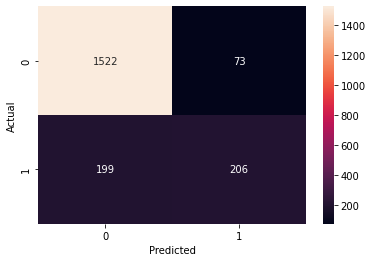

In [ ]:
conf_matrix = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## XGBOOST CLASSIFIER

In [ ]:
import xgboost as xgb

In [ ]:
m3 = xgb.XGBClassifier()
params1 = {
    'learning_rate':[0.1,0.01,0.0001],
    "n_estimators":[10,100,1000],
    "max_depth":[3,5,10,20],
}

In [ ]:
clf3= RandomizedSearchCV(m3,params1,cv=skf,n_jobs=-1,scoring='f1')
clf3.fit(X_train,Y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.0001],
                                        'max_depth': [3, 5, 10, 20],
                                        'n_estimators': [10, 100, 1000]},
                   scoring='f1')

In [ ]:
print(clf3.best_params_)
print(clf3.best_score_)

{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
0.5700764838630636


In [ ]:
xgb = xgb.XGBClassifier(scale_pos_weight=2, n_estimators=1000, min_child_weight=5, max_depth= 20, learning_rate= 0.1)
model3 = xgb.fit(X_train,Y_train)
score3 = model3.score(X_train,Y_train)
score3

1.0

In [ ]:
xgb_pred = model3.predict(x_test)

In [ ]:
print(cf(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1595
           1       0.62      0.55      0.58       405

    accuracy                           0.84      2000
   macro avg       0.76      0.73      0.74      2000
weighted avg       0.84      0.84      0.84      2000



In [ ]:
xgb_accuracy = accuracy_score(y_test , xgb_pred)
xgb_precision = precision_score(y_test , xgb_pred)
xgb_recall = recall_score(y_test , xgb_pred)
xgb_f1 = f1_score(y_test , xgb_pred)

Text(33.0, 0.5, 'Actual')

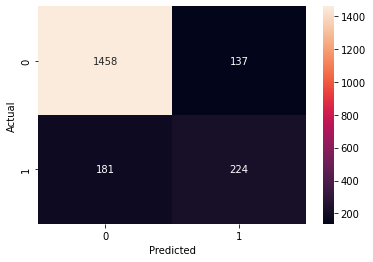

In [ ]:
conf_matrix = confusion_matrix(y_test,xgb_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
value={"MODEL":["LOGISTIC REGRESSION","RANDOM FOREST","XG BOOST"],
       "Training_accuracy":[score1,score2,score3],
       "ACCURACY":[lr_accuracy,rf_accuracy,xgb_accuracy],
       "PRECISION":[lr_precision,rf_precision,xgb_precision],
       "RECALL":[lr_recall,rf_recall,xgb_recall],
       "F1-SCORE":[lr_f1,rf_f1,xgb_f1]}

pd.DataFrame(value)

,MODEL,Training_accuracy,ACCURACY,PRECISION,RECALL,F1-SCORE
0,LOGISTIC REGRESSION,0.63875,0.634,0.332308,0.800000,0.469565
1,RANDOM FOREST,1.00000,0.864,0.738351,0.508642,0.602339
2,XG BOOST,1.00000,0.841,0.620499,0.553086,0.584856


- Random forest performing better than other models
- we can compare from f1-score
- That data is not that imbalance after hyper parameter tunning

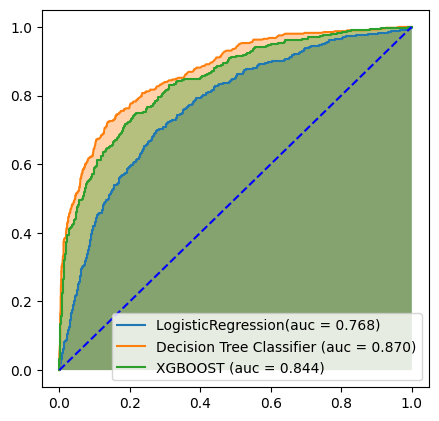

In [ ]:
fpr , tpr , threshold = roc_curve(y_test , model1.predict_proba(x_test)[:,1])
# calculate AUC
log_auc = auc(fpr , tpr)

fpr1 , tpr1 , threshold1 = roc_curve(y_test , model2.predict_proba(x_test)[:,1])
# calculate AUC
rf_auc = auc(fpr1 , tpr1)

fpr2 , tpr2 , threshold2 = roc_curve(y_test , model3.predict_proba(x_test)[:,1])
# calculate AUC
xgb_auc = auc(fpr2 , tpr2)

plt.figure(figsize=(5,5),dpi = 100)
plt.plot(fpr , tpr , label = "LogisticRegression(auc = %0.3f)"%(log_auc))
plt.plot(fpr1 , tpr1 , label = "Decision Tree Classifier (auc = %0.3f)"%(rf_auc))
plt.plot(fpr2 , tpr2 , label = "XGBOOST (auc = %0.3f)"%(xgb_auc))
plt.fill_between(fpr, tpr , alpha = 0.5)
plt.fill_between(fpr1, tpr1 , alpha = 0.35)
plt.fill_between(fpr2, tpr2 , alpha = 0.35)
plt.plot([0,1],[0,1], linestyle= '--', color = 'b')
plt.legend()



# Random Forest

In [ ]:
model2.feature_importances_

array([0.14380677, 0.03808373, 0.01886679, 0.23811948, 0.08095685,
       0.14267072, 0.12916624, 0.019162  , 0.03940709, 0.14976033])

In [ ]:
df5 = pd.DataFrame({"column_name":X2.columns,"best_features":model2.feature_importances_}).sort_values(by='best_features',ascending=False)
df5

,column_name,best_features
3,Age,0.238119
9,EstimatedSalary,0.149760
0,CreditScore,0.143807
5,Balance,0.142671
6,NumOfProducts,0.129166
4,Tenure,0.080957
8,IsActiveMember,0.039407
1,Geography,0.038084
7,HasCrCard,0.019162
2,Gender,0.018867


## PREDICTED And ACTUAL VALUES

In [ ]:
df8 = pd.DataFrame({"Actual":y_test,"Predicted":rf_pred})
df8

,Actual,Predicted
9394,0,0
898,1,0
2398,0,0
5906,0,0
2343,0,0
...,...,...
1037,0,0
2899,0,0
9549,0,0
2740,0,0


In [ ]:
probability = model2.predict_proba(x_test)
probability

array([[0.729, 0.271],
       [0.769, 0.231],
       [0.769, 0.231],
       ...,
       [0.928, 0.072],
       [0.739, 0.261],
       [0.767, 0.233]])

In [ ]:
df8['probability_no_churn'] = probability[:,0]
df8['probability_churn'] = probability[:,1]
df8.head()

,Actual,Predicted,probability_no_churn,probability_churn
9394,0,0,0.729,0.271
898,1,0,0.769,0.231
2398,0,0,0.769,0.231
5906,0,0,0.969,0.031
2343,0,0,0.974,0.026


In [ ]:
df8.to_csv("Affan.csv",index=False)

In [ ]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df1 = df1.drop(['Exited'],axis=1)

In [ ]:
list1 = []

for i in df1.columns:
  enter = float(input(f"Enter {i}: "))
  list1.append(enter)

c = np.array(list1).reshape(1,-1)

model2.predict(c)

Enter CreditScore: 23.4
Enter Geography: 54.6
Enter Gender: 67.8
Enter Age: 33.4
Enter Tenure: 23.4
Enter Balance: 56.7
Enter NumOfProducts: 12.3
Enter HasCrCard: 45.6
Enter IsActiveMember: 22.44
Enter EstimatedSalary: 45.6


array([1])